##### 선형회귀

In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 전처리
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold

# 모형
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# 다항회귀
from sklearn.preprocessing import PolynomialFeatures

# 샘플데이터
from sklearn.datasets import fetch_california_housing

# 평가
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

##### 데이터 생성

In [7]:
np.random.seed(2022)
x = np.arange(50)
y = 3 * x + 2 * np.random.randn(50)

[k.shape for k in [x, y]]

[(50,), (50,)]

In [8]:
xy_pair = {}
for i, (j,k) in enumerate(zip(x, y)):
    xy_pair[i] = (j, np.round(k,2))
    
print(xy_pair)

{0: (0, -0.0), 1: (1, 2.45), 2: (2, 5.72), 3: (3, 12.97), 4: (4, 12.56), 5: (5, 16.52), 6: (6, 18.6), 7: (7, 22.08), 8: (8, 24.75), 9: (9, 27.76), 10: (10, 29.82), 11: (11, 28.39), 12: (12, 38.29), 13: (13, 35.93), 14: (14, 40.27), 15: (15, 47.03), 16: (16, 50.07), 17: (17, 49.35), 18: (18, 54.04), 19: (19, 56.23), 20: (20, 59.39), 21: (21, 64.99), 22: (22, 65.75), 23: (23, 66.05), 24: (24, 68.12), 25: (25, 76.67), 26: (26, 76.87), 27: (27, 83.35), 28: (28, 84.64), 29: (29, 87.38), 30: (30, 90.74), 31: (31, 92.8), 32: (32, 94.12), 33: (33, 96.19), 34: (34, 106.16), 35: (35, 104.76), 36: (36, 109.52), 37: (37, 114.65), 38: (38, 112.68), 39: (39, 115.38), 40: (40, 121.78), 41: (41, 122.57), 42: (42, 124.12), 43: (43, 130.2), 44: (44, 136.45), 45: (45, 137.0), 46: (46, 140.3), 47: (47, 140.69), 48: (48, 140.7), 49: (49, 144.09)}


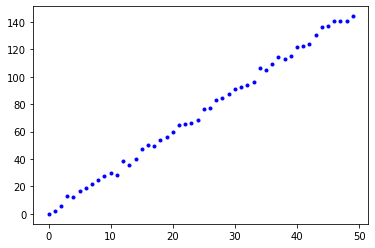

In [9]:
plt.plot(x, y, 'b.')
plt.show()


In [4]:
# 오차(Error)
# 추정된 a, b가 주어진 자료 x와 y를 얼마나 잘 설명하고 있는가?
# 손실(Loss), 비용(Cost)
# 추정된 값(Y_hat)과 실제값(Y)사이의 차이(오차, 잔차)는 작으면 작을수록 자료간의 관계를 잘 설명하고 있다고 판단

In [ ]:
# 오차에 대한 정의
# 1. LAD(Least Absolute Error) : 최소절대오차, L1 loss(L1 norm을 사용하기 때문), manhattan distance사용
# 2. LSE(Least Squared Error)  : 최소제곱오차. L2 loss(L2 norm을 사용하기 때문), euclidean distance사용

In [19]:
# 오차함수
def error(a, b):
    return np.mean(np.square(y - (a*x +b)))

# 기울기함수(편미분)
def grad_fa(a, b):
    return np.mean(-2 * x * (y-(a*x+b)))

# 기울기함수(편미분)
def grad_fb(a, b):
    return np.mean(-2 * (y-(a*x+b)))

In [22]:
beta0, beta1 = 0, 0

lr = 0.01
maxIter = 100
fval = []
beta0_list = []
beta1_list = []

for i in range(maxIter):
    fval.append(error(beta0, beta1))
    grad = np.array([grad_fa(beta0, beta1), grad_fb(beta0, beta1)])
    beta0 = beta0 - lr * grad[0]
    beta1 = beta1 - lr * grad[1]
    beta0_list.append(beta0)
    beta1_list.append(beta1)
    

In [23]:
print(beta0_list)

[48.55757601817283, -688.7823114142547, 10507.615424885626, -159508.04093068512, 2422154.7444378254, -36780015.69580804, 558499188.051007, -8480728141.305959, 128778612009.5114, -1955484320226.984, 29693742362065.242, -450895119098078.6, 6846776197742748.0, -1.0396729154164853e+17, 1.5787280609624328e+18, -2.3972753868189143e+19, 3.6402274858814525e+20, -5.527632003326354e+21, 8.393628058329748e+22, -1.2745600998616416e+24, 1.9354008026924403e+25, -2.938877709626371e+26, 4.462642663020159e+27, -6.776457377785733e+28, 1.0289951058252422e+30, -1.5625139638350145e+31, 2.372654518333587e+32, -3.602841058490023e+33, 5.470861262118443e+34, -8.307422521128983e+35, 1.2614699155766473e+37, -1.9155235500032024e+38, 2.908694393190962e+39, -4.416809740066309e+40, 6.706860757050274e+41, -1.0184269611256937e+43, 1.5464663912358908e+44, -2.3482865149001045e+45, 3.5658386029680814e+46, -5.414673576558122e+47, 8.222102345370553e+48, -1.248514172127072e+50, 1.895850443749124e+51, -2.878821070120727e+52,

In [21]:
print(fval)

[7295.106219477046, 1681112.075888889, 387629439.09085757, 89379504789.26607, 20609105395539.27, 4752042721944077.0, 1.0957249040064634e+18, 2.526519931556505e+20, 5.825643773553071e+22, 1.3432755844292716e+25, 3.0973217138941215e+27, 7.141797193787339e+29, 1.6467539335157443e+32, 3.7970813843727927e+34, 8.755301412135691e+36, 2.018795360374064e+39, 4.6549336398844746e+41, 1.0733335144832706e+44, 2.4748899177467096e+46, 5.7065954079642066e+48, 1.3158254400198756e+51, 3.0340272348502894e+53, 6.995852931430053e+55, 1.6131021394939273e+58, 3.7194871560971775e+60, 8.576384821305946e+62, 1.977540814532801e+65, 4.559809004171486e+67, 1.05139969813647e+70, 2.424314975101285e+72, 5.589979823008733e+74, 1.2889362456022973e+77, 2.972026192991055e+79, 6.852891073520414e+81, 1.5801380275950064e+84, 3.643478583658825e+86, 8.40112443201254e+88, 1.9371293147902042e+91, 4.466628262189231e+93, 1.0299141043533432e+96, 2.374773542999202e+98, 5.4757473042569036e+100, 1.2625965380349038e+103, 2.91129215663

In [40]:
print(beta0)

[nan nan]


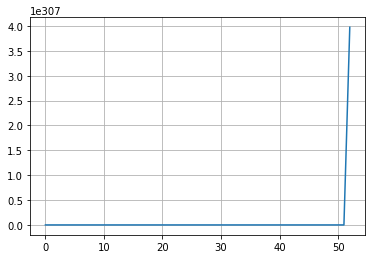

In [9]:
plt.plot(fval)
plt.grid()
plt.show()

In [12]:
beta0

array([-1.14285927e+291, -3.46431258e+289])

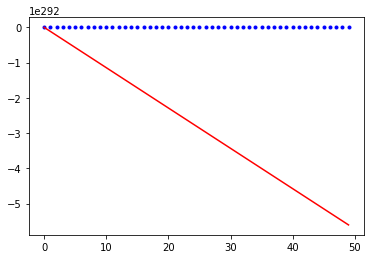

In [11]:
plt.plot(x, y, 'b.')
plt.plot(x, beta0[0]*x + beta0[1], 'r-')